In [1]:
import pandas as pd
import os

In [35]:
#get excel file
xlsx = pd.read_excel('/home/jess/wd_speciesid/data/raw/BtF-information/Beyond_the_Fence_ALL_TAGS_to_Feb22.xlsx',
                     header=1)
xlsx

,RecordID,Image Name,Site,Treatment,Date,Time,Moon Phase,Temp,Comments,Number,Pouch status,Species
0,BFGrid01874,2021-05-24 17-58-33 M 1_3.JPG,PCAM01,Park,2021-05-24,17:58:33,Waxing Gibbous,21,NaN,2.0,NaN,Red Kangaroo
1,BFGrid01880,2021-05-24 18-02-50 M 2_3.JPG,PCAM01,Park,2021-05-24,18:02:50,Waxing Gibbous,21,NaN,1.0,NaN,Red Kangaroo
2,BFGrid01881,2021-05-24 22-38-03 M 1_3.JPG,PCAM01,Park,2021-05-24,22:38:03,Waxing Gibbous,16,NaN,2.0,NaN,Red Kangaroo
3,BFGrid01890,2021-05-24 21-27-09 M 1_3.JPG,PCAM01,Park,2021-05-24,21:27:09,Waxing Gibbous,17,NaN,2.0,NaN,Red Kangaroo
4,BFGrid01891,2021-05-24 21-26-03 M 3_3.JPG,PCAM01,Park,2021-05-24,21:26:03,Waxing Gibbous,17,NaN,2.0,NaN,Red Kangaroo
...,...,...,...,...,...,...,...,...,...,...,...,...
15351,BFGrid14116,2021-12-27 01-44-43 M 1_3.JPG,WCAM15,WTZ,2021-12-27,01:44:43,Last Quarter,23,NaN,1.0,NaN,Red Kangaroo
15352,BFGrid14117,2021-12-27 03-05-32 M 1_3.JPG,WCAM15,WTZ,2021-12-27,03:05:32,Last Quarter,22,NaN,1.0,NaN,Red Kangaroo
15353,BFGrid14494,2022-01-14 23-20-32 M 1_3.JPG,WCAM15,WTZ,2022-01-14,23:20:32,Waxing Gibbous,23,NaN,1.0,NaN,Red Kangaroo
15354,BFGrid14534,2022-01-15 02-37-22 M 3_3.JPG,WCAM15,WTZ,2022-01-15,02:37:22,Waxing Gibbous,19,NaN,1.0,NaN,Red Kangaroo


In [67]:
species_totals = xlsx.groupby('Species')['Number'].sum().reset_index()
species_totals

,Species,Number
0,Bird,809.0
1,Cat,2393.0
2,Dingo,136.0
3,Echidna,18.0
4,Emu,377.0
5,Euro,60.0
6,Fox,35.0
7,Goat,63.0
8,Kangaroo,1506.0
9,Other,13.0


In [6]:
import json

md = json.load(open('/home/jess/wd_speciesid/data/intermediate/coco.json'))

In [56]:
md_dict = {}

for category in md['categories']:
    sp_id = category['id']
    sp = category['name']
    md_dict[sp_id] = sp

In [57]:
md_dict

{0: 'Red Kangaroo',
 1: 'Kangaroo',
 2: 'Dingo',
 3: 'Rabbit',
 4: 'Cat',
 5: 'Emu',
 6: 'Bird',
 7: 'Pig',
 8: 'Euro',
 9: 'Fox',
 10: 'Echidna',
 11: 'Western Grey Kangaroo',
 12: 'Small mammal',
 13: 'Other',
 14: 'Goat'}

In [68]:
#sort the df by md_dict

# Create a new column 'Species_ID' by mapping 'Species' to the corresponding IDs in md_dict
species_totals['Species_ID'] = species_totals['Species'].map(md_dict)
# Fill NaN values in 'Species_ID' with a default value, e.g., 'Unknown'
species_totals['Species_ID'].fillna('Unknown', inplace=True)
# Sort the DataFrame based on 'Species_ID'
species_totals = species_totals.sort_values(by='Species_ID')
# Drop the temporary 'Species_ID' column if you don't need it anymore
species_totals = species_totals.drop(columns='Species_ID')

In [69]:
species_totals

,Species,Number
0,Bird,809.0
1,Cat,2393.0
2,Dingo,136.0
3,Echidna,18.0
4,Emu,377.0
5,Euro,60.0
6,Fox,35.0
7,Goat,63.0
8,Kangaroo,1506.0
9,Other,13.0


In [74]:
detections = []

for annotation in md['annotations']:
    detections.append(annotation['category_id'])

In [76]:
from collections import Counter

md_detections = Counter(detections)

In [77]:
md_detections

Counter({0: 18124,
         3: 1672,
         2: 185,
         1: 2366,
         4: 2999,
         5: 596,
         6: 1298,
         7: 66,
         8: 74,
         9: 41,
         10: 24,
         11: 295,
         12: 767,
         13: 36,
         14: 130})

In [110]:
import collections
detections = collections.OrderedDict(md_detections)

In [111]:
detections

OrderedDict([(0, 18124),
             (3, 1672),
             (2, 185),
             (1, 2366),
             (4, 2999),
             (5, 596),
             (6, 1298),
             (7, 66),
             (8, 74),
             (9, 41),
             (10, 24),
             (11, 295),
             (12, 767),
             (13, 36),
             (14, 130)])

In [33]:
species_totals['detections']=detections

In [79]:
matched_counts = {md_dict[key]: value for key, value in md_detections.items()}

In [80]:
matched_counts

{'Red Kangaroo': 18124,
 'Rabbit': 1672,
 'Dingo': 185,
 'Kangaroo': 2366,
 'Cat': 2999,
 'Emu': 596,
 'Bird': 1298,
 'Pig': 66,
 'Euro': 74,
 'Fox': 41,
 'Echidna': 24,
 'Western Grey Kangaroo': 295,
 'Small mammal': 767,
 'Other': 36,
 'Goat': 130}

In [81]:
# Merge the DataFrames on the 'Species' column
merged_df = species_totals.merge(pd.DataFrame(list(matched_counts.items()), columns=['Species', 'Count']), on='Species', how='inner')

In [113]:
merged_df

,Species,Ground truth,MegaDetector
0,Bird,809.0,1298
1,Cat,2393.0,2999
2,Dingo,136.0,185
3,Echidna,18.0,24
4,Emu,377.0,596
5,Euro,60.0,74
6,Fox,35.0,41
7,Goat,63.0,130
8,Kangaroo,1506.0,2366
9,Other,13.0,36


In [88]:
#rename columns
merged_df = merged_df.rename(columns={'Number': 'Ground truth', 'Count': 'MegaDetector'})
#make into long form
df = pd.melt(merged_df, id_vars = 'Species')
df

,Species,variable,value
0,Bird,Ground truth,809.0
1,Cat,Ground truth,2393.0
2,Dingo,Ground truth,136.0
3,Echidna,Ground truth,18.0
4,Emu,Ground truth,377.0
5,Euro,Ground truth,60.0
6,Fox,Ground truth,35.0
7,Goat,Ground truth,63.0
8,Kangaroo,Ground truth,1506.0
9,Other,Ground truth,13.0


In [123]:
import numpy as np

sort = merged_df.groupby(['Species'])['Ground truth'].aggregate(np.median).reset_index().sort_values('Ground truth', ascending=False)

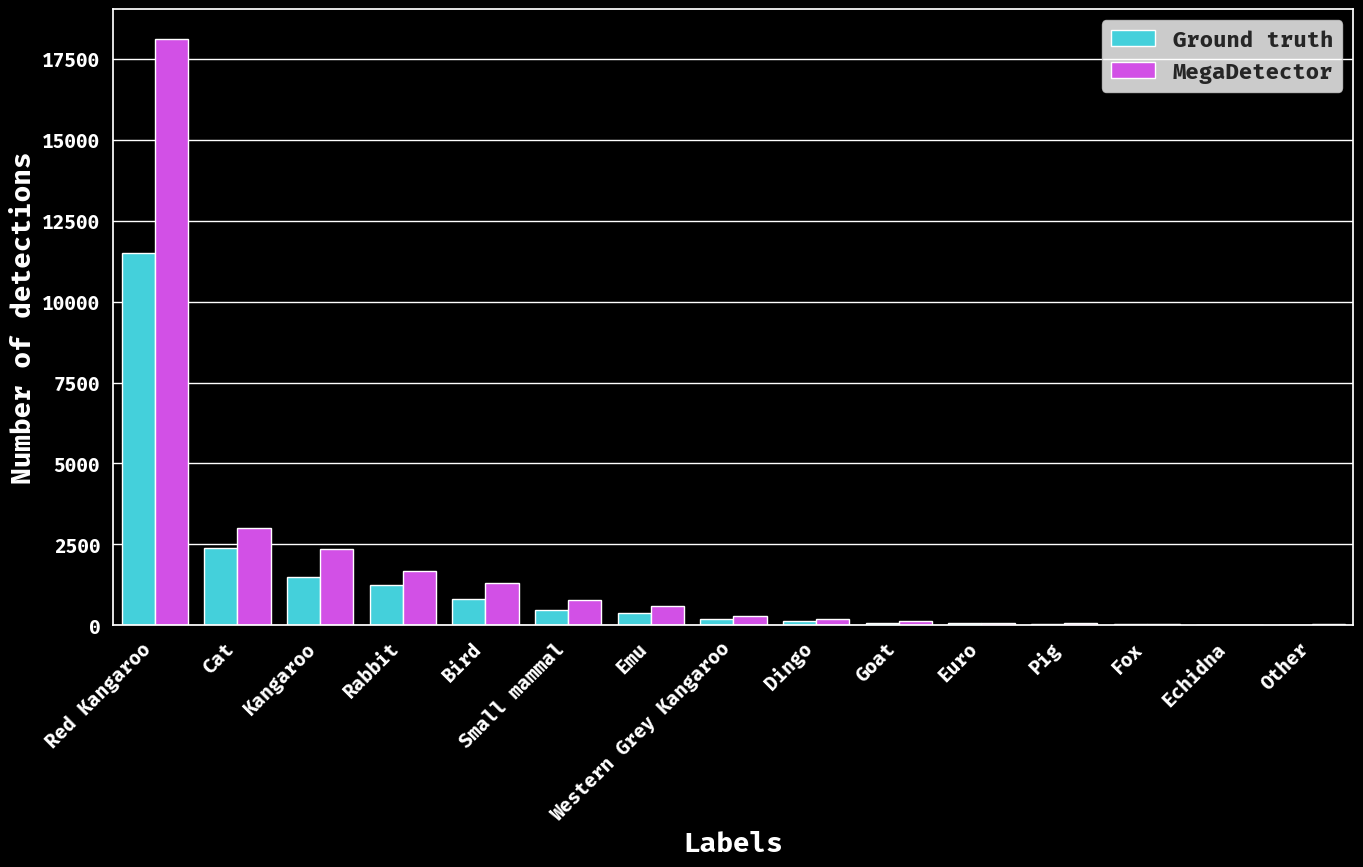

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.font_manager import fontManager, FontProperties

#plot overall
plt.figure(figsize =(16, 8))
# plt.style.use('dark_background')

#font
font_path = '/home/jess/wd_speciesid/fonts/FiraMono-Bold.ttf'
fontManager.addfont(font_path)

prop = FontProperties(fname=font_path)
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black'},
font=prop.get_name())

#plot
colours = ['#2BE6F4', '#E437FF']

sns.barplot(
    data=df,
    x='Species',
    y='value',
    order=sort['Species'],
    hue='variable',
    palette=colours
    )

plt.xlabel('Labels', size=20, color='white')
plt.xticks(rotation=45, size=14, color='white', horizontalalignment='right')
plt.ylabel('Number of detections', size=20, color='white')
plt.yticks(size=14, color='white')
plt.legend(title=False, fontsize=16, facecolor='white')

plt.show() 